In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
import matplotlib.dates as mdates
import seaborn

In [69]:
seaborn.set()
data = pd.read_csv("dog_rates_tweets.csv", parse_dates=[1])


In [70]:
data['rating'] = data.text.str.extract(r'(\d+(\.\d+)?)/10')[0]
data['status'] = data.rating.notna()


In [71]:
data_status = data.status

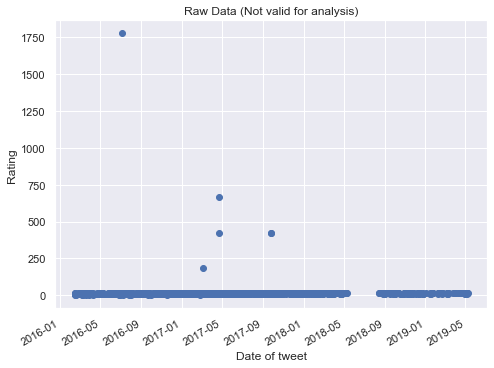

In [72]:
data = data[data_status]
data['rating'] = pd.to_numeric(data['rating'])
data_rating = data['rating']
data = data.drop(columns=['status'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(data.created_at, data.rating)
ax.set_xlabel('Date of tweet')
ax.set_ylabel('Rating')
ax.set_title("Raw Data (Not valid for analysis)")
fig.autofmt_xdate()
plt.show() 

In [73]:
data = data[data_rating < 25]
data

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


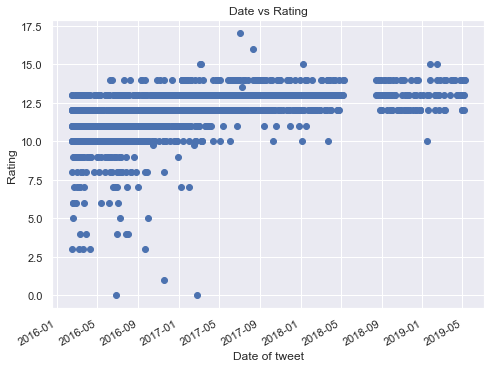

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(data.created_at, data.rating)
ax.set_xlabel('Date of tweet')
ax.set_ylabel('Rating')
ax.set_title("Date vs Rating")
fig.autofmt_xdate()
plt.show() 

In [75]:
def to_timestamp(d):
    return datetime.timestamp(d)
data['timestamp'] = data['created_at'].apply(to_timestamp)
fit = linregress(data['timestamp'], data['rating'])
data['prediction'] = data['timestamp']*fit.slope + fit.intercept
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,13.185711
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,13.181733
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,13.179557
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,13.167562
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,13.163752
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535081e+09,13.507284
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534982e+09,13.503802
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534836e+09,13.498656
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534376e+09,13.482486


In [76]:
fit.slope, fit.intercept

(3.515911103419407e-08, -40.464805015444)

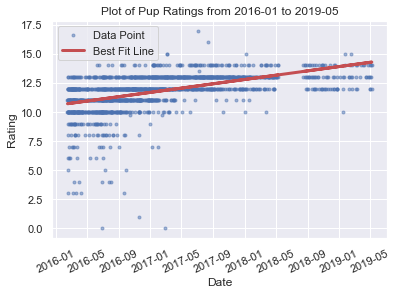

In [77]:
plt.xticks(rotation=25)
pl1, = plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
pl2, = plt.plot(data['created_at'], data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.xlabel("Date")
plt.ylabel("Rating")
plt.title("Plot of Pup Ratings from 2016-01 to 2019-05")
plt.legend([pl1, pl2], ['Data Point', 'Best Fit Line'])
plt.show()

In [78]:
data2 = data
data2['month'] = pd.DatetimeIndex(data2['created_at']).month
data2['year'] = pd.DatetimeIndex(data2['created_at']).year
data2

,id,created_at,text,rating,timestamp,prediction,month,year
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,13.185711,5,2018
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,13.181733,5,2018
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,13.179557,5,2018
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,13.167562,5,2018
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,13.163752,5,2018
...,...,...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535081e+09,13.507284,8,2018
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534982e+09,13.503802,8,2018
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534836e+09,13.498656,8,2018
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534376e+09,13.482486,8,2018


In [79]:
avgs = data2.groupby(['year', 'month']).mean().reset_index()
avgs = avgs.drop(columns=['id', 'timestamp', 'prediction'])
avgs['ym'] = pd.to_datetime(avgs[['year', 'month']].assign(Day=1))
avgs

,year,month,rating,ym
0,2016,2,10.318182,2016-02-01
1,2016,3,10.582090,2016-03-01
2,2016,4,10.737705,2016-04-01
3,2016,5,10.898305,2016-05-01
4,2016,6,10.432990,2016-06-01
5,2016,7,10.922330,2016-07-01
6,2016,8,11.066667,2016-08-01
7,2016,9,11.256098,2016-09-01
8,2016,10,11.787037,2016-10-01
9,2016,11,11.674419,2016-11-01


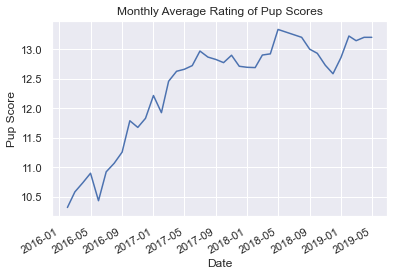

In [80]:
fig, ax = plt.subplots()
ax.plot(avgs['ym'], avgs['rating'])
plt.xlabel("Date")
plt.ylabel("Rating")
plt.title("Monthly Average Rating of Pup Ratings")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

In [81]:
fit.pvalue

1.5147945275922275e-106

In [82]:
re = data['rating'] - data['timestamp'] * fit.slope + fit.intercept

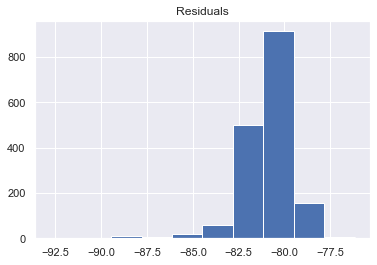

In [84]:
plt.hist(re)
plt.title("Residuals")
plt.show()